In [2]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt

from utils import load_train_val_loaders
from train import TrainingAlgorithm
from model import GraphNetwork

# Training

Epoch 1: Avg Train Loss=0.040332, Val Loss=0.036516
Epoch 2: Avg Train Loss=0.037369, Val Loss=0.034023
Epoch 3: Avg Train Loss=0.036072, Val Loss=0.032152
Epoch 4: Avg Train Loss=0.034439, Val Loss=0.030273
Epoch 5: Avg Train Loss=0.033279, Val Loss=0.029785
Epoch 6: Avg Train Loss=0.032451, Val Loss=0.028456
Epoch 7: Avg Train Loss=0.031664, Val Loss=0.028324
Epoch 8: Avg Train Loss=0.031201, Val Loss=0.027817
Epoch 9: Avg Train Loss=0.030512, Val Loss=0.028661
Epoch 10: Avg Train Loss=0.029932, Val Loss=0.027966
Epoch 11: Avg Train Loss=0.029660, Val Loss=0.028257
Epoch 12: Avg Train Loss=0.028942, Val Loss=0.027920
Epoch 13: Avg Train Loss=0.028554, Val Loss=0.026565
Epoch 14: Avg Train Loss=0.027988, Val Loss=0.025769
Epoch 15: Avg Train Loss=0.027582, Val Loss=0.025882
Epoch 16: Avg Train Loss=0.027419, Val Loss=0.026105
Epoch 17: Avg Train Loss=0.027042, Val Loss=0.026826
Epoch 18: Avg Train Loss=0.026535, Val Loss=0.024456
Epoch 19: Avg Train Loss=0.026422, Val Loss=0.024065
Ep

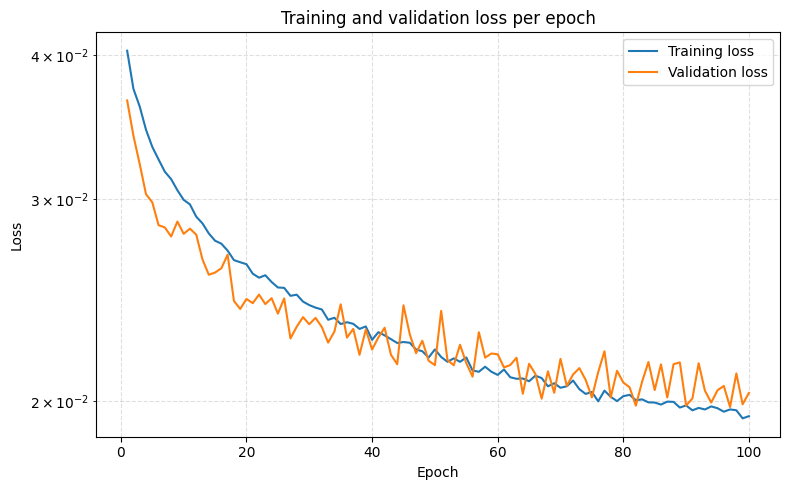

In [3]:
# 1. load data
train_loader, val_loader = load_train_val_loaders(data_dir = "simulated_data/training_data/",
                                                  nodes_file = "nodes_t.pt",
                                                  vel_file = "vel_updated_true.pt",
                                                  edge_index_file = "edge_index.pt",
                                                  batch_size = 1)     # keep batch size equal to 1

# 2. Create model
model = GraphNetwork()

# 3. Train model
num_epochs = 100
train_losses, val_losses = TrainingAlgorithm(model = model,
                                             train_loader = train_loader,
                                             val_loader = val_loader,
                                             num_epochs = num_epochs)

# 4. Plot loss
epochs = np.arange(1, len(train_losses)+1)

plt.figure(figsize=(8, 5))
plt.plot(epochs, train_losses, label="Training loss")
plt.plot(epochs, val_losses, label="Validation loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.yscale("log")
plt.title("Training and validation loss per epoch")
plt.legend()
plt.grid(True, which="both", linestyle="--", alpha=0.4)
plt.tight_layout()
plt.show()

## Test generalization to more simulated bodies

In [6]:
from utils import evaluate
from torch.utils.data import DataLoader

# 5. Load a new dataset with more bodies (N_test)
test_loader, _ = load_train_val_loaders(
    data_dir="simulated_data/generalization_data/",
    batch_size=1,
    val_frac=0.0
)

# IMPORTANT: preserve temporal order for evaluation
test_loader = DataLoader(
    test_loader.dataset,
    batch_size=1,
    shuffle=False,
    collate_fn=test_loader.collate_fn
)

# 6. Evaluate generalization
metrics = evaluate(model, test_loader, device="cpu", rollout_steps=4)
print("Generalization metrics:", metrics)
print("one_step_l1 ratio:", metrics['one_step_l1']/val_losses[-1])

Generalization metrics: {'one_step_l1': 0.057935087382793425, 'rollout_l1': 0.11662114597856998}
one_step_l1 ratio: 2.84738585411814
